## Lab 11.2

### Activity 1
Complete this activity before the end of the lab by entering the answer into the Brightspace quiz. Add, commit and push this notebook to your repository.
 


Name: `time-T9-five` `temp-3`

Complete  activity 1 before the end of the lab by entering the answer into the CourseSpaces quiz.

A trajectory is a time evolution of temperature. In this case it describes typical timescales and temperatures for H-burning nucleosynthesis in stars. 

1. Read file `T-evol.dat` using numpy's `loadtxt` method (see nb `2.2_Python_II.ipynb`) and combine all data read from the file into one dictionary `traj_data`, so that you can access it like this: `traj_data['T9']` and likewise for key `'time'`. 
2. Plot temperature as a function of time. Use log scale when appropriate. 
3. Calculate the product of the fifth values of time and temperature contained in the file `T-evol.dat` using the dictionary `traj_data`. Enter the product into the quiz `time-T9-five`, **rounded to two decimals!**
4. Create a linear interpolation object using `interpolate.interp1d` called `temp_int`. Enter the result of `temp_int(2.0e4)` rounded to two decimals into quiz `temp-3`.

In [5]:
#%pylab ipympl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [6]:
#1 using dataframes bc i need more practice
traj_data = pd.read_csv('../Data/T-evol.dat', sep=' ', header=None, names=['Time', 'T9'], skiprows=11)


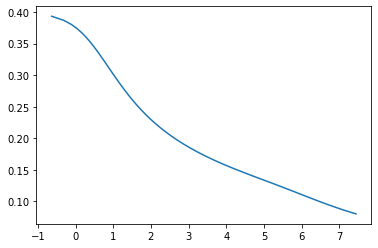

Q1: traj_data: 0.41


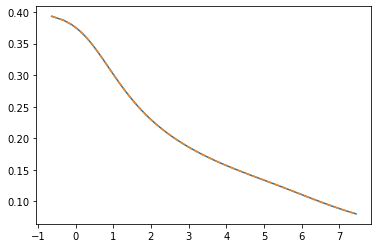

Q2 temp-3: 0.15


In [7]:
#2
plt.plot(np.log10(traj_data['Time']), traj_data['T9'])
plt.show()
#3
print("Q1: traj_data: %.2f" %(traj_data['Time'][4]*traj_data['T9'][4]))
#4
temp_int=interpolate.interp1d(traj_data['Time'],traj_data['T9'],kind='linear')
plt.plot(np.log10(traj_data['Time']), temp_int(traj_data['Time']))
plt.plot(np.log10(traj_data['Time']), traj_data['T9'], '--')
plt.show()

print('Q2 temp-3: %.2f' %temp_int(2.0e4))

### Activity 2
Name: `rate-0.2`, `4rates-sum`

Finish by Thursday 9:30am. 

In the `Data` dir you find these files: `files = ['c12pg.txt','c13pg.txt','n14pg.txt','n15pa.txt']`. They each contain a table with two columns, the temperature in units of $10^9K$ called `T9` and a reaction rate. 

1. Create a data dictionary called `nucdata` that has as first key the file name, and then for each file data set the two key `T9` and `rate`. It contains all reaction rate data and can be accessed like this: `nucdata['n15pa.txt']['rate'][where(nucdata['n15pa.txt']['T9']==0.2)[0][0]]` which would return the rate from the `n15pa.txt` file for `T9 = 0.02`. Round to two decimals and enter into `rate-0.2` 
2. Create in a loop over `files` a 1D interpolation function and store these in a list called `fints`. Make a plot of the four interpolation functions for the temperature array `TT=linspace(0.1,0.3,100)`. Each line must have different color, shape and glyph. Use `markevery` to ensure that there are not too many glyphs.  
3. Write a function `get_rates` that takes this list as an optional argument, as well as a temperature as `T9` and return the interpolated rates from all for files. Calculate the sum of the four rates as returned from `get_rates` for `T9=0.189`, and enter into `4rates-sum` rounded to two decimals. 

In [8]:
#instead of nested dict, have dict of dataframes
files = ['c12pg.txt','c13pg.txt','n14pg.txt','n15pa.txt']
nucdata={}
for file in files:
    nucdata[file] = pd.read_csv('../Data/'+file, sep=' ', header=None, names=['T9','rate'], skiprows=3)

rate02 = nucdata['n15pa.txt']['rate'][np.where(nucdata['n15pa.txt']['T9']==.2)[0][0]]
print("Q1 rate-0.2: %.2f" %rate02)

Q1 rate-0.2: 96.64


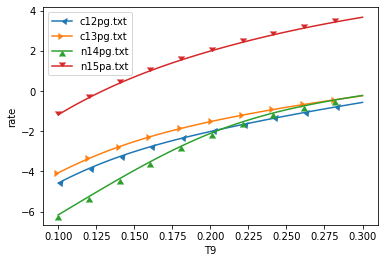

Q2 4rates-sum: 54.62


In [10]:
#2
fints = []
for file in files:
    t9 = nucdata[file]['T9']
    rate = np.log10(nucdata[file]['rate'])
    inter = interpolate.interp1d(t9, rate, kind='cubic')
    fints.append(inter)

TT = np.linspace(.1,.3,100)
plt.figure(1)
for i,fint in enumerate(fints):
    plt.plot(TT, fint(TT), marker=i+4,markevery=10,label=files[i])
plt.legend()
plt.ylabel('rate')
plt.xlabel('T9')
plt.show()
plt.close(1)

#3
def get_rates(t9,fints=[]):
    '''return interpolated rates for all files (aka reverse the log10)'''
    return [10**fint(t9) for fint in fints]

print("Q2 4rates-sum: %.2f" %sum(get_rates(.189, fints)))